In [110]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [111]:
df1 = pd.read_csv("noida_flats1.csv")
df1.head()

,Unnamed: 0,Area in Sqrt,No.of Bhk,Location,Price
0,0,3720,4,"Sector 107, Noida",3.9 Cr
1,1,1625,3,"Sector 50, Noida",1.15 Cr
2,2,1325,3,"Sector 120, Noida",60 L
3,3,650,1,"Sector 73, Noida",19 L
4,4,950,2,"Phase 2 Noida Extension, Noida",25.99 L


In [112]:
df1.shape

(4460, 5)

In [113]:
df2 = df1.drop(['Unnamed: 0'],axis='columns')
df2.head()

,Area in Sqrt,No.of Bhk,Location,Price
0,3720,4,"Sector 107, Noida",3.9 Cr
1,1625,3,"Sector 50, Noida",1.15 Cr
2,1325,3,"Sector 120, Noida",60 L
3,650,1,"Sector 73, Noida",19 L
4,950,2,"Phase 2 Noida Extension, Noida",25.99 L


In [114]:
df2.isnull().sum()

Area in Sqrt    0
No.of Bhk       0
Location        0
Price           0
dtype: int64

In [115]:
df2['No.of Bhk'].unique()

array([ 4,  3,  1,  2,  5,  6,  8, 10,  7,  9])

In [116]:
df3 = df2.copy()

In [117]:
df3.rename(columns={'Area in Sqrt': 'Area_in_Sqft', 'No.of Bhk': 'Num_BHK'}, inplace=True)
df3.head()

,Area_in_Sqft,Num_BHK,Location,Price
0,3720,4,"Sector 107, Noida",3.9 Cr
1,1625,3,"Sector 50, Noida",1.15 Cr
2,1325,3,"Sector 120, Noida",60 L
3,650,1,"Sector 73, Noida",19 L
4,950,2,"Phase 2 Noida Extension, Noida",25.99 L


In [118]:
df3[df3.Num_BHK>8]

,Area_in_Sqft,Num_BHK,Location,Price
433,4500,10,"Sector 30, Noida",3.3 Cr
535,4859,9,"Sector 15A, Noida",16 Cr
1797,4500,9,"Sector 50, Noida",9 Cr
2017,7000,10,"Sector 26, Noida",6 Cr
2081,15000,10,"Sector 47, Noida",12 Cr
3550,10000,10,"Sector 61, Noida",13 Cr
3573,10000,10,"Sector 61, Noida",5.25 Cr
3600,10000,10,"Sector 61, Noida",5.65 Cr
3693,7200,9,"Sector 92, Noida",6.5 Cr
3739,11000,9,"Sector 47, Noida",10.5 Cr


In [119]:
df3.Area_in_Sqft.unique()

array([ 3720,  1625,  1325,   650,   950,  2050,  2460,  1425,  2500,
        1750,  1970,   585,   783,   600,  3000,  1155,  2150,  1525,
        1690,  6250,   750,  1500,  1050,  1775,  2450,  3751,  1180,
        1220,   690,  1100,   960,  1150,  6480,  1380,  1695,   953,
        4874,  1200,  2715,  1580,   604,  1300,  3047,  8000,  1245,
        3525,  2410,  5724,   535,  1350,  1248,  2563,   990,  1390,
        1465,  1404,  2970,  2575,  3550,  2510,  5300,  2700,  1945,
        2385,  1760,  3465,  3325,  3775,  3575,  6100,  5550,  2850,
        5900,  1510,   500,  3220,   850,   550,   800,   925,  2095,
        1675,  1195,  2800,  3750,  4350,  1550,  3650,  2750,   771,
         801,   773,  1455,   977,  1903,  1202,  1907,  3027,  2062,
        2330,  2190,  1075,   952,   652,   657,   987,   900,   920,
        1051,  1085,  2555,   780,  1000,   980,   820,   525,   450,
         480,  2000,  8500,  4700,  2375,  1587,   815,   510,  2158,
        6000,  1345,

In [120]:
def convert_price(price):
    # Split the price string into value and unit
    value, unit = price.split()
    value = float(value)
    
    if unit == 'Cr':
        return value * 100  # Convert Crores to Lakhs
    return value  # Keep Lakhs unchanged

In [121]:
df4 = df3.copy()
# Apply the conversion function to the 'Price' column
df4['Price'] = df4['Price'].apply(convert_price)
df4.head()

,Area_in_Sqft,Num_BHK,Location,Price
0,3720,4,"Sector 107, Noida",390.00
1,1625,3,"Sector 50, Noida",115.00
2,1325,3,"Sector 120, Noida",60.00
3,650,1,"Sector 73, Noida",19.00
4,950,2,"Phase 2 Noida Extension, Noida",25.99


In [122]:
duplicates = df4[df4.duplicated()]
print(duplicates)

      Area_in_Sqft  Num_BHK           Location   Price
14            1750        3  Sector 150, Noida  135.00
62            1390        3   Sector 78, Noida   93.82
64            1465        3   Sector 78, Noida   98.88
66            1155        2  Sector 150, Noida   86.00
67            1155        2  Sector 150, Noida   86.00
...            ...      ...                ...     ...
4442          1850        3  Sector 152, Noida  129.00
4443          1266        2  Sector 150, Noida  115.00
4444          3650        4  Sector 150, Noida  259.00
4445          2850        3  Sector 150, Noida  199.00
4459          1050        2   Sector 49, Noida   35.00

[2091 rows x 4 columns]


In [123]:
df4.duplicated().sum()

np.int64(2091)

In [124]:
partial_dup = df4[df4.duplicated(subset=['Area_in_Sqft', 'Num_BHK', 'Location','Price'], keep=False)]
print(partial_dup)

      Area_in_Sqft  Num_BHK            Location  Price
0             3720        4   Sector 107, Noida  390.0
5             2050        4   Sector 150, Noida  198.0
7             1425        3  Sector 143B, Noida   94.5
9             1750        3   Sector 150, Noida  135.0
10            1970        3    Sector 77, Noida  128.0
...            ...      ...                 ...    ...
4442          1850        3   Sector 152, Noida  129.0
4443          1266        2   Sector 150, Noida  115.0
4444          3650        4   Sector 150, Noida  259.0
4445          2850        3   Sector 150, Noida  199.0
4459          1050        2    Sector 49, Noida   35.0

[2734 rows x 4 columns]


In [125]:
# Remove exact duplicates and store the result in df5
df5 = df4.drop_duplicates().reset_index(drop=True)
df5.shape

(2369, 4)

In [126]:
df5.head(3)

,Area_in_Sqft,Num_BHK,Location,Price
0,3720,4,"Sector 107, Noida",390.0
1,1625,3,"Sector 50, Noida",115.0
2,1325,3,"Sector 120, Noida",60.0


In [127]:
df6 = df5.copy()
df6['price_per_sqft'] = df6['Price']*100000/df6['Area_in_Sqft']
df6.head()

,Area_in_Sqft,Num_BHK,Location,Price,price_per_sqft
0,3720,4,"Sector 107, Noida",390.00,10483.870968
1,1625,3,"Sector 50, Noida",115.00,7076.923077
2,1325,3,"Sector 120, Noida",60.00,4528.301887
3,650,1,"Sector 73, Noida",19.00,2923.076923
4,950,2,"Phase 2 Noida Extension, Noida",25.99,2735.789474


In [128]:
len(df6.Location.unique())

91

In [129]:
df6.Location = df6.Location.apply(lambda x: x.strip())

location_stats = df6.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_stats

Location
Sector 150, Noida          492
Sector 73, Noida           177
Sector 49, Noida           124
Sector 75, Noida            92
Sector 137, Noida           81
                          ... 
Sector 91, Noida             1
Sector 22, Noida             1
Chhajarsi Colony, Noida      1
Sector 33, Noida             1
Bahlolpur, Noida             1
Name: Location, Length: 91, dtype: int64

In [130]:
len(location_stats[location_stats<=5])

38

In [131]:
location_stats_less_than_5 = location_stats[location_stats<=5]
location_stats_less_than_5

Location
Sector 27, Noida                       5
Sector 28, Noida                       5
Sector 51, Noida                       5
Sector 16B, Noida                      5
Sector 17A Yamuna Expressway, Noida    5
Sector 71, Noida                       4
rho 2, Noida                           4
Sector 30, Noida                       4
Sector 117, Noida                      4
Sector 102, Noida                      4
Sector 168, Noida                      4
Sector 47, Noida                       3
Sector 36, Noida                       3
Sector 52, Noida                       3
Sector 113, Noida                      3
Sector 81, Noida                       2
Sector 92, Noida                       2
Sector 93B, Noida                      2
Yeida, Noida                           2
Sector 26, Noida                       2
Sector 15, Noida                       2
Sector 25 Yamuna Express Way, Noida    2
Sector 22D Yamuna Expressway, Noida    2
Sector 122, Noida                      2
Sector 

In [132]:
len(df6.Location.unique())

91

In [133]:
df6.Location = df6.Location.apply(lambda x: 'other' if x in location_stats_less_than_5 else x )
len(df6.Location.unique())

54

In [134]:
df6.head(10)

,Area_in_Sqft,Num_BHK,Location,Price,price_per_sqft
0,3720,4,"Sector 107, Noida",390.00,10483.870968
1,1625,3,"Sector 50, Noida",115.00,7076.923077
2,1325,3,"Sector 120, Noida",60.00,4528.301887
3,650,1,"Sector 73, Noida",19.00,2923.076923
4,950,2,"Phase 2 Noida Extension, Noida",25.99,2735.789474
5,2050,4,"Sector 150, Noida",198.00,9658.536585
6,2460,3,"Sector 150, Noida",222.00,9024.390244
7,1425,3,"Sector 143B, Noida",94.50,6631.578947
8,2500,3,"Sector 107, Noida",225.00,9000.000000
9,1750,3,"Sector 150, Noida",135.00,7714.285714


**Removing Outliers**

In [140]:
df6[df6.Area_in_Sqft/df6.Num_BHK<300].head()

,Area_in_Sqft,Num_BHK,Location,Price,price_per_sqft
13,783,3,"Sector 150, Noida",105.00,13409.961686
636,1100,4,"Sector 50, Noida",35.65,3240.909091
766,792,3,"Sector 19 Yamuna Expressway, Noida",50.52,6378.787879
767,558,2,"Sector 19 Yamuna Expressway, Noida",36.60,6559.139785
1167,460,2,Urbainia Trinity Noida Extension Yakubpur Noid...,12.99,2823.913043


In [141]:
df6.shape

(2369, 5)

In [142]:
df7 = df6[~(df6.Area_in_Sqft/df6.Num_BHK<300)]
df7.shape

(2362, 5)

In [143]:
df7.price_per_sqft.describe()

count     2362.000000
mean      6808.082696
std       4880.408764
min       1406.752412
25%       3220.652174
50%       5925.627968
75%       8484.095509
max      68571.428571
Name: price_per_sqft, dtype: float64

In [144]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df8 = remove_pps_outliers(df7)
df8.shape

(1746, 5)

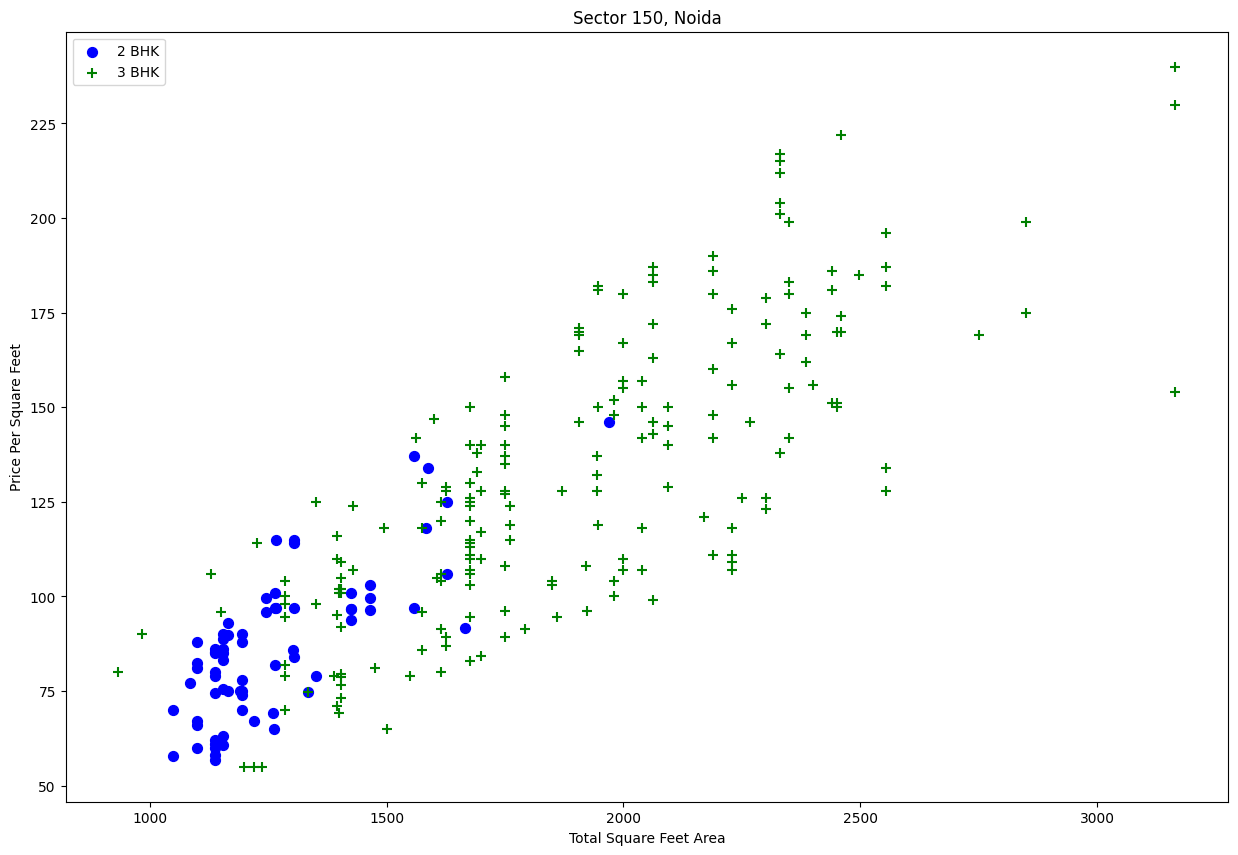

In [146]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.Location == location) & (df.Num_BHK==2)]
    bhk3 = df[(df.Location == location) & (df.Num_BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Area_in_Sqft,bhk2.Price,color='blue', label='2 BHK', s = 50)
    plt.scatter(bhk3.Area_in_Sqft,bhk3.Price,marker='+',color='green', label='3 BHK', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df8,"Sector 150, Noida")

**We should also remove properties where for same location, the price of(for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e. { '1' : { 'mean': 4000, 'std': 2000, 'count': 34 }, '2' : { 'mean': 4300, 'std': 2300, 'count': 22 }, } Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [147]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('Num_BHK'):
            bhk_stats[bhk] = {
            'mean': np.mean(bhk_df.price_per_sqft),
            'std': np.std(bhk_df.price_per_sqft),
            'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('Num_BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df9 = remove_bhk_outliers(df8)
df9.shape

(1257, 5)

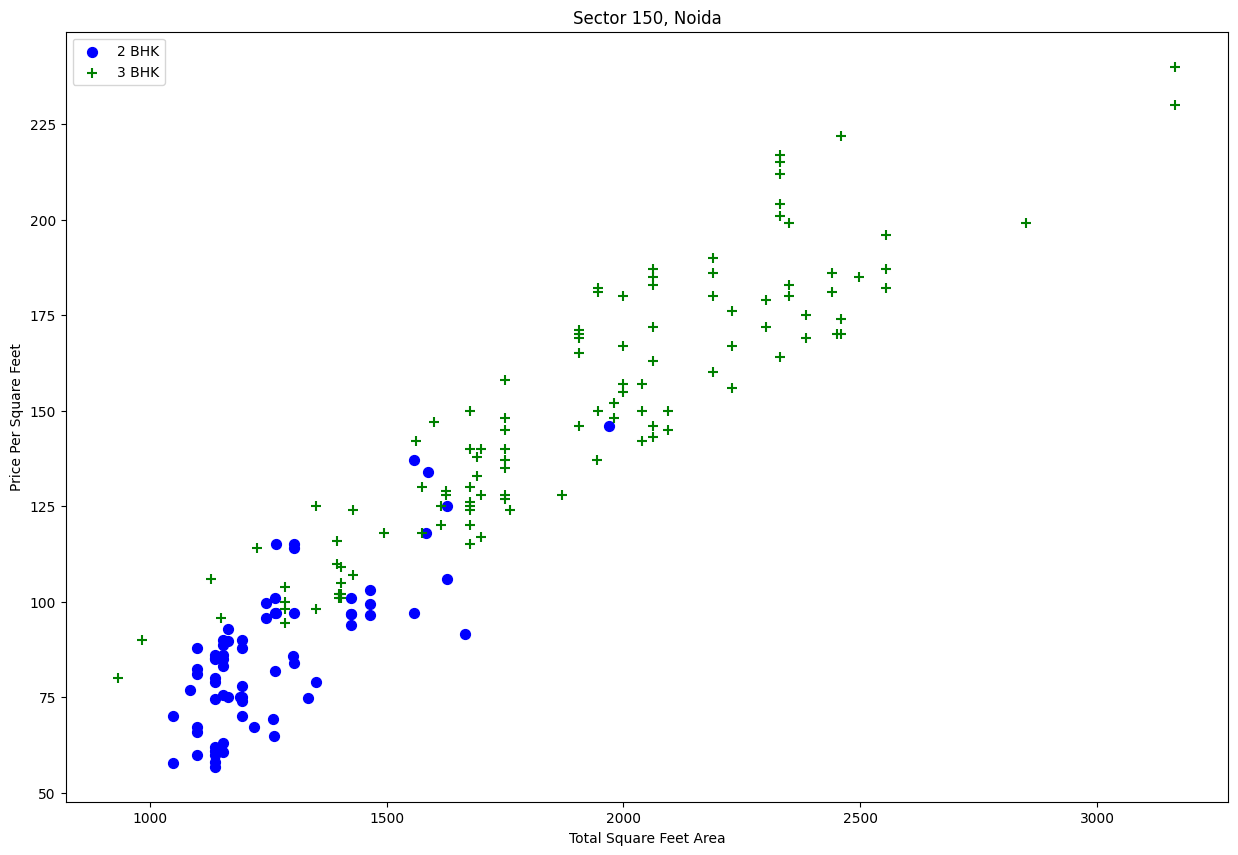

In [148]:
plot_scatter_chart(df9,"Sector 150, Noida")

Text(0, 0.5, 'count')

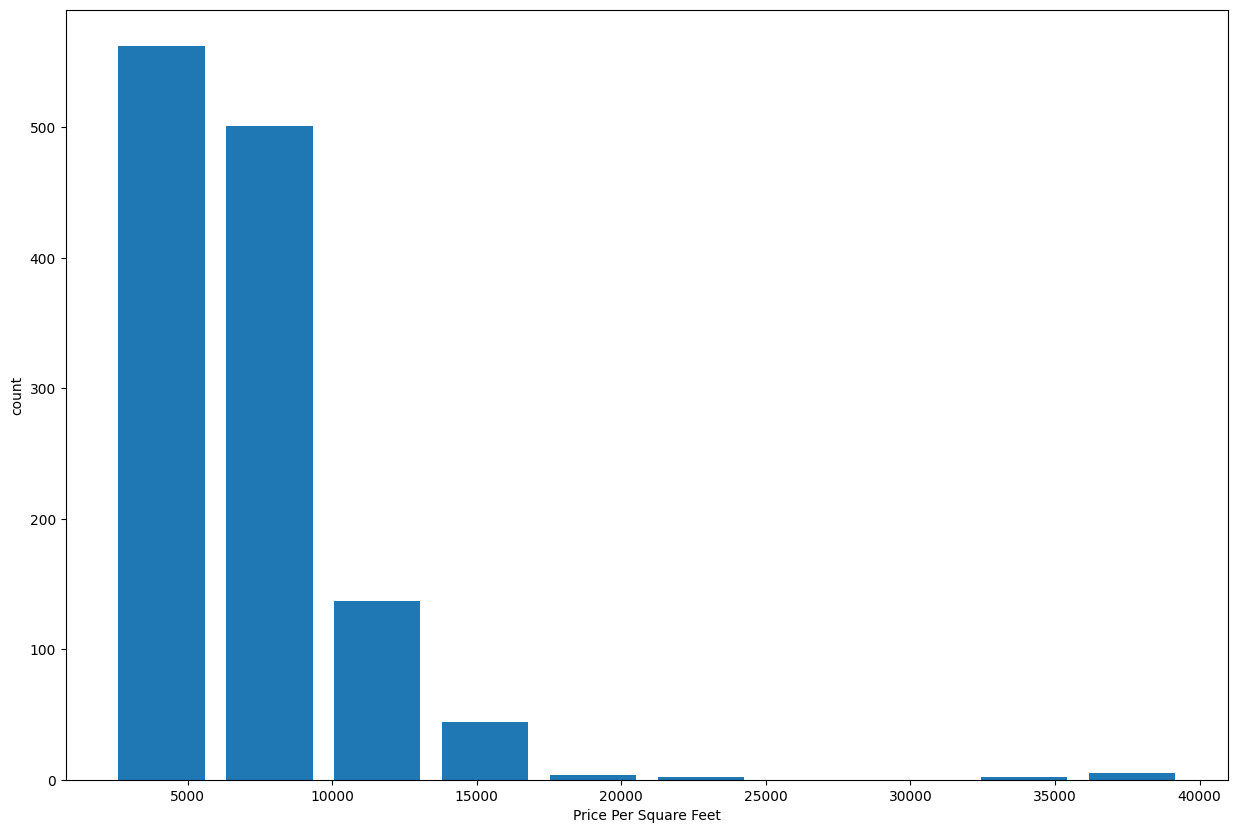

In [149]:
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("count")

In [150]:
df9.shape

(1257, 5)

In [151]:
df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head(3)

,Area_in_Sqft,Num_BHK,Location,Price
0,950,2,"Phase 2 Noida Extension, Noida",25.99
1,945,2,"Phase 2 Noida Extension, Noida",25.90
2,1350,3,"Phase 2 Noida Extension, Noida",35.90


**One-Hot Encoding (OHE)**

In [152]:
dummies = pd.get_dummies(df10.Location).astype(int)
dummies.head(3)

,"Phase 2 Noida Extension, Noida","Sector 100, Noida","Sector 104, Noida","Sector 105, Noida","Sector 107, Noida","Sector 108, Noida","Sector 110, Noida","Sector 118, Noida","Sector 119, Noida","Sector 120, Noida",...,"Sector 77, Noida","Sector 78, Noida","Sector 79, Noida","Sector 82, Noida","Sector 93, Noida","Sector 93A, Noida","Sector 94, Noida","Sector-106 Noida, Noida","Urbainia Trinity Noida Extension Yakubpur Noida, Noida",other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,Area_in_Sqft,Num_BHK,Location,Price,"Phase 2 Noida Extension, Noida","Sector 100, Noida","Sector 104, Noida","Sector 105, Noida","Sector 107, Noida","Sector 108, Noida",...,"Sector 76, Noida","Sector 77, Noida","Sector 78, Noida","Sector 79, Noida","Sector 82, Noida","Sector 93, Noida","Sector 93A, Noida","Sector 94, Noida","Sector-106 Noida, Noida","Urbainia Trinity Noida Extension Yakubpur Noida, Noida"
0,950,2,"Phase 2 Noida Extension, Noida",25.99,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,945,2,"Phase 2 Noida Extension, Noida",25.90,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1350,3,"Phase 2 Noida Extension, Noida",35.90,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
df12  = df11.drop('Location',axis='columns')
df12.head(2)

,Area_in_Sqft,Num_BHK,Price,"Phase 2 Noida Extension, Noida","Sector 100, Noida","Sector 104, Noida","Sector 105, Noida","Sector 107, Noida","Sector 108, Noida","Sector 110, Noida",...,"Sector 76, Noida","Sector 77, Noida","Sector 78, Noida","Sector 79, Noida","Sector 82, Noida","Sector 93, Noida","Sector 93A, Noida","Sector 94, Noida","Sector-106 Noida, Noida","Urbainia Trinity Noida Extension Yakubpur Noida, Noida"
0,950,2,25.99,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,945,2,25.90,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
df12.shape

(1257, 56)

In [156]:
X = df12.drop('Price',axis='columns')
X.head()

,Area_in_Sqft,Num_BHK,"Phase 2 Noida Extension, Noida","Sector 100, Noida","Sector 104, Noida","Sector 105, Noida","Sector 107, Noida","Sector 108, Noida","Sector 110, Noida","Sector 118, Noida",...,"Sector 76, Noida","Sector 77, Noida","Sector 78, Noida","Sector 79, Noida","Sector 82, Noida","Sector 93, Noida","Sector 93A, Noida","Sector 94, Noida","Sector-106 Noida, Noida","Urbainia Trinity Noida Extension Yakubpur Noida, Noida"
0,950,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,945,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1350,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1300,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
y = df12.Price
y.head()

0    25.99
1    25.90
2    35.90
3    34.90
4    28.99
Name: Price, dtype: float64

In [159]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [160]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9136949052155271

In [161]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.92250075, 0.86992386, 0.83904451, 0.89779993, 0.89892243])

In [162]:
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': Pipeline([
            ('scaler', StandardScaler()),  # Apply Standardization
            ('regressor', LinearRegression())
            ]),
            'params': {}  # No need for normalize now
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # Fixed "mse" to "squared_error"
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Call the function
find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.885638,{}
1,lasso,0.856182,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.870978,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [163]:
X.columns

Index(['Area_in_Sqft', 'Num_BHK', 'Phase 2 Noida Extension, Noida',
       'Sector 100, Noida', 'Sector 104, Noida', 'Sector 105, Noida',
       'Sector 107, Noida', 'Sector 108, Noida', 'Sector 110, Noida',
       'Sector 118, Noida', 'Sector 119, Noida', 'Sector 120, Noida',
       'Sector 121, Noida', 'Sector 128, Noida', 'Sector 134, Noida',
       'Sector 137, Noida', 'Sector 14, Noida', 'Sector 143, Noida',
       'Sector 143B, Noida', 'Sector 144, Noida', 'Sector 149, Noida',
       'Sector 150, Noida', 'Sector 151, Noida', 'Sector 152, Noida',
       'Sector 15A, Noida', 'Sector 18, Noida',
       'Sector 19 Yamuna Expressway, Noida', 'Sector 19, Noida',
       'Sector 34, Noida', 'Sector 37, Noida', 'Sector 39, Noida',
       'Sector 40, Noida', 'Sector 41, Noida', 'Sector 43, Noida',
       'Sector 44, Noida', 'Sector 45, Noida', 'Sector 46, Noida',
       'Sector 49, Noida', 'Sector 50, Noida', 'Sector 61, Noida',
       'Sector 62, Noida', 'Sector 72, Noida', 'Sector 73, No

In [164]:
def predict_price(location, sqft, bhk, model, X):
    # Ensure location exists in columns
    if location in X.columns:
        loc_index = np.where(X.columns == location)[0][0]
    else:
        loc_index = -1  # Handle unknown locations gracefully

    # Create input array
    x = np.zeros(len(X.columns))  # Initialize with zeros
    x[0] = sqft
    x[1] = bhk

    # Set location feature to 1 if found
    if loc_index >= 0:
        x[loc_index] = 1

    # Predict using trained model
    return float(model.predict([x])[0])  # Ensure 2D array input

In [167]:
predict_price('Sector 150, Noida',1155,2,lr_clf, X)

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.36709715616871

In [168]:
import pickle
with open('noida_home_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [169]:
import json
columns = {
        'data_columns' : [col.lower() for col in X.columns]
    }
with open("noida_columns.json","w") as f:
    f.write(json.dumps(columns))